In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Cleaning

In [7]:
nulls = df.isnull().sum()
nulls_percentage = (nulls / len(df)) * 100
print(pd.concat([nulls, nulls_percentage], axis=1).rename(columns={0: "Null Count", 1: "Null %"}))

                  Null Count  Null %
car_ID                     0     0.0
symboling                  0     0.0
CarName                    0     0.0
fueltype                   0     0.0
aspiration                 0     0.0
doornumber                 0     0.0
carbody                    0     0.0
drivewheel                 0     0.0
enginelocation             0     0.0
wheelbase                  0     0.0
carlength                  0     0.0
carwidth                   0     0.0
carheight                  0     0.0
curbweight                 0     0.0
enginetype                 0     0.0
cylindernumber             0     0.0
enginesize                 0     0.0
fuelsystem                 0     0.0
boreratio                  0     0.0
stroke                     0     0.0
compressionratio           0     0.0
horsepower                 0     0.0
peakrpm                    0     0.0
citympg                    0     0.0
highwaympg                 0     0.0
price                      0     0.0


In [8]:
# In the given data there is no column with high null percentage
# If there will be any column with high null percentage the use the code below to remove the column
# df.drop(columns=["column_name"], axis=1, inplace=True)

In [9]:
df = df.dropna(thresh=df.shape[1] * 0.7)   # we are keeping only the rows with >= 70% non-null

In [10]:
df.drop(['car_ID'], axis=1, inplace=True)   # dropping the unwanted column

In [11]:
# Sorting table according to price
df.sort_values(by="price", ascending=False, inplace=True)

## Data Visualization

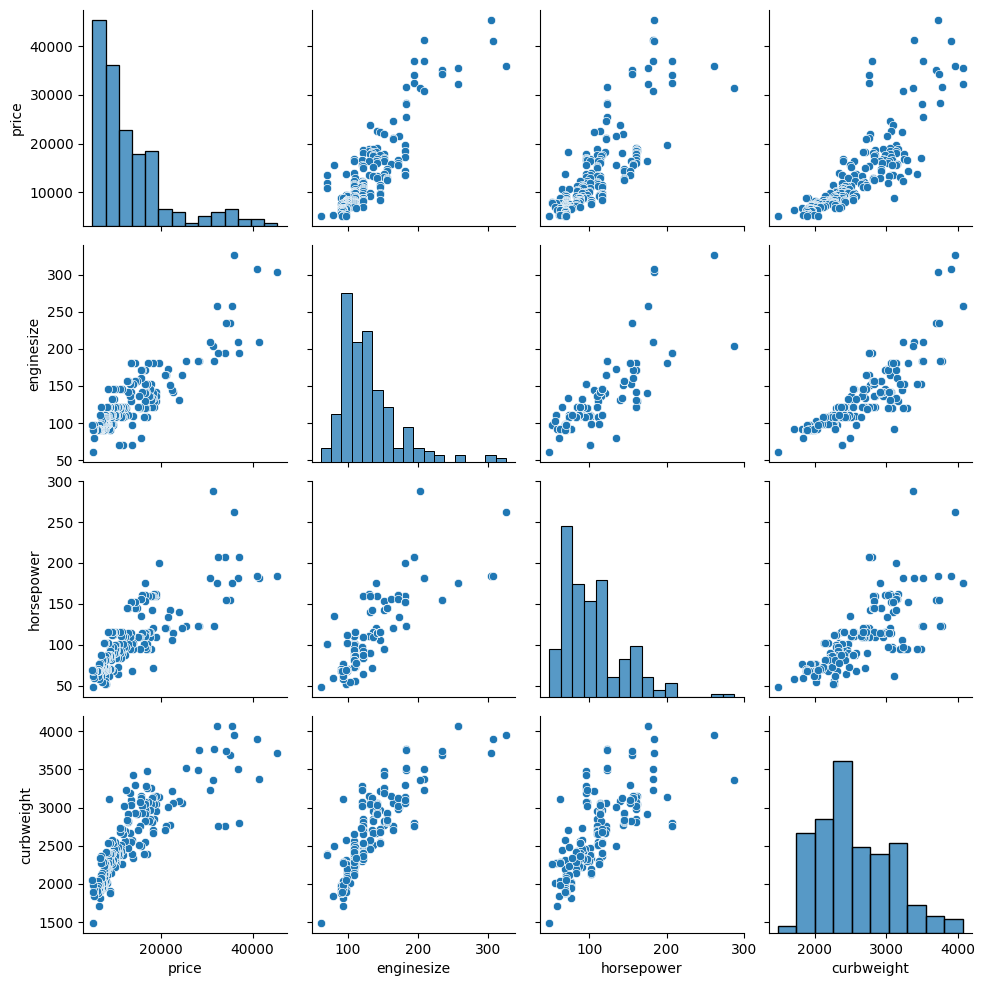

In [13]:
sns.pairplot(df[['price', 'enginesize', 'horsepower', 'curbweight']])
plt.show()

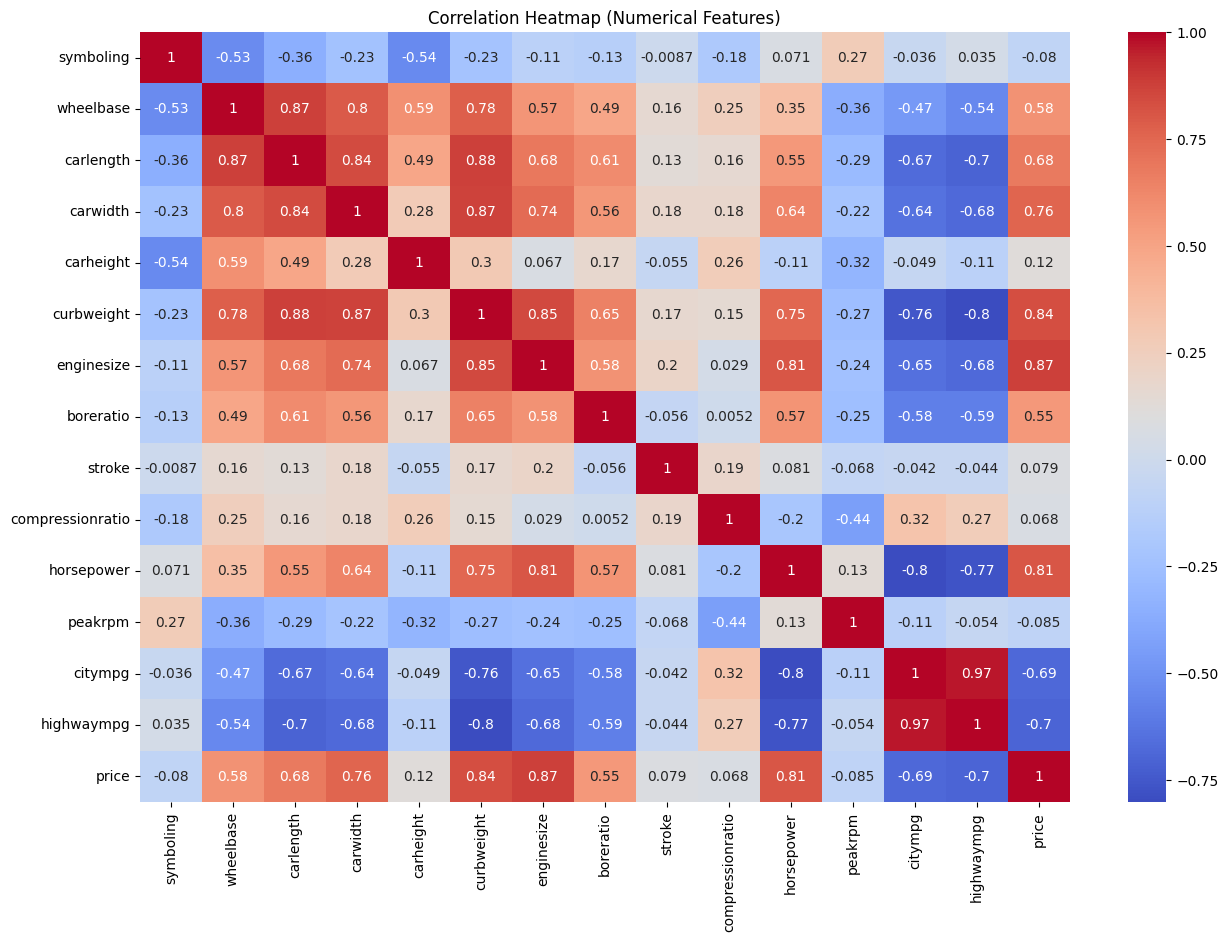

In [17]:
# Keep only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


## Data Preparation

In [19]:
df['CarCompany'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop(['CarName'], axis=1, inplace=True)


In [20]:
df['CarCompany'] = df['CarCompany'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'maxda': 'mazda',
    'nissan': 'nissan'
})


In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [22]:
df['car_stability'] = df['wheelbase'] / df['carlength']

In [23]:
df.drop(['carlength', 'carwidth', 'curbweight', 'wheelbase', 'highwaympg', 'car_stability'], axis=1, inplace=True)

## Data Analysis and Modeling

In [24]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [29]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [27]:
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train_scaled, y_train)

selected_cols = X_train_scaled.columns[rfe.support_]
print("Selected Features:", selected_cols.tolist())

Selected Features: ['enginesize', 'horsepower', 'peakrpm', 'enginelocation_rear', 'enginetype_ohcv', 'cylindernumber_twelve', 'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_jaguar', 'CarCompany_mitsubishi', 'CarCompany_nissan', 'CarCompany_plymouth', 'CarCompany_renault']


In [30]:
X_train_rfe = sm.add_constant(X_train_scaled[selected_cols])
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     81.18
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.79e-57
Time:                        11:55:01   Log-Likelihood:                -1325.1
No. Observations:                 143   AIC:                             2682.
Df Residuals:                     127   BIC:                             2730.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1914.62

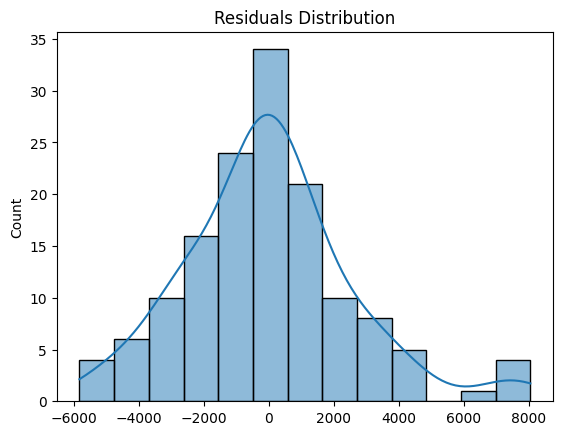

In [31]:
# residual analysis

y_train_pred = lm.predict(X_train_rfe)
residuals = y_train - y_train_pred

plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [32]:
X_test_rfe = sm.add_constant(X_test_scaled[selected_cols])
y_test_pred = lm.predict(X_test_rfe)

In [33]:
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.9107805344135418
RMSE: 2060.631119757686


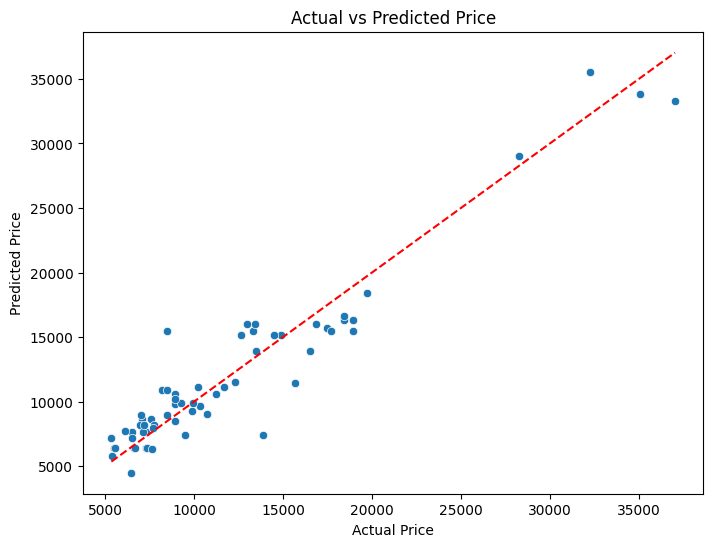

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.show()

### Final Model Equation (based on the report)

Price = 0.2578*carlength + 0.6109*enginesize + 0.01969*bmw + 0.1800*buick + 
        0.3035*porshe - 0.0942*four (cylinder)